# **Deep Learning Task 1**
#### Team Members - 
#### Akshay Shukla (2022A7PS0087P)
#### Ishaan Kale (2022A7PS0084P)
#### Siddhartha Gotur (2022A7PS0070P)

# **Data Loading**

In [21]:
import tensorflow as tf
import os
import numpy as np

train_data_dir = './train_data'
val_data_dir = './val_data'      
train_labels_path = './train_labels.txt'
val_labels_path = './val_labels.txt'

#We define all the parameters to be used
img_height = 256 
img_width = 256
batch_size = 32

def load_labels(labels_path): #This function reads all the labels from the text files
    with open(labels_path, 'r') as file:
        labels = [line.strip() for line in file]
    return np.array(labels, dtype=int)

train_labels = load_labels(train_labels_path)
val_labels = load_labels(val_labels_path)

def process_image(file_path, label): #This function does all the image pre-processing
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    img = tf.cast(img, tf.float32) / 255.0  # Normalizes pixel values to [0, 1]
    return img, label

def create_dataset(image_dir, labels): #This function creates a dataset from a directory of images
    image_paths = [os.path.join(image_dir, fname) for fname in sorted(os.listdir(image_dir))]
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_data_dir, train_labels)
val_dataset = create_dataset(val_data_dir, val_labels)

for images, labels in train_dataset.take(1): #This is for checking the dimensions of images in a single batch
    print(images.shape, labels.shape)

(32, 256, 256, 3) (32,)


# **Data Visualisation**

Visualizing Training Data:


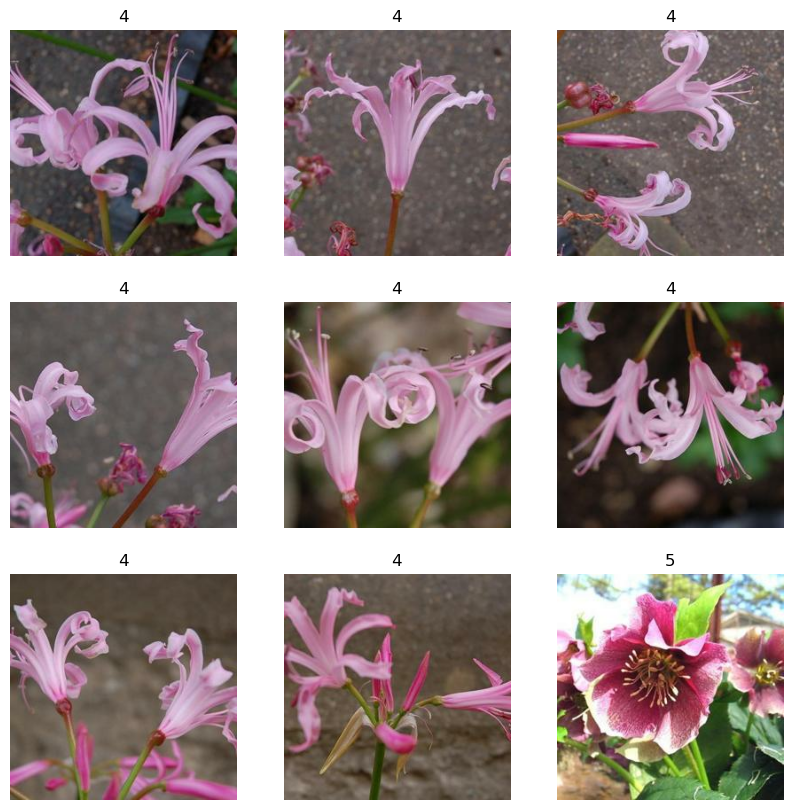

Visualizing Validation Data:


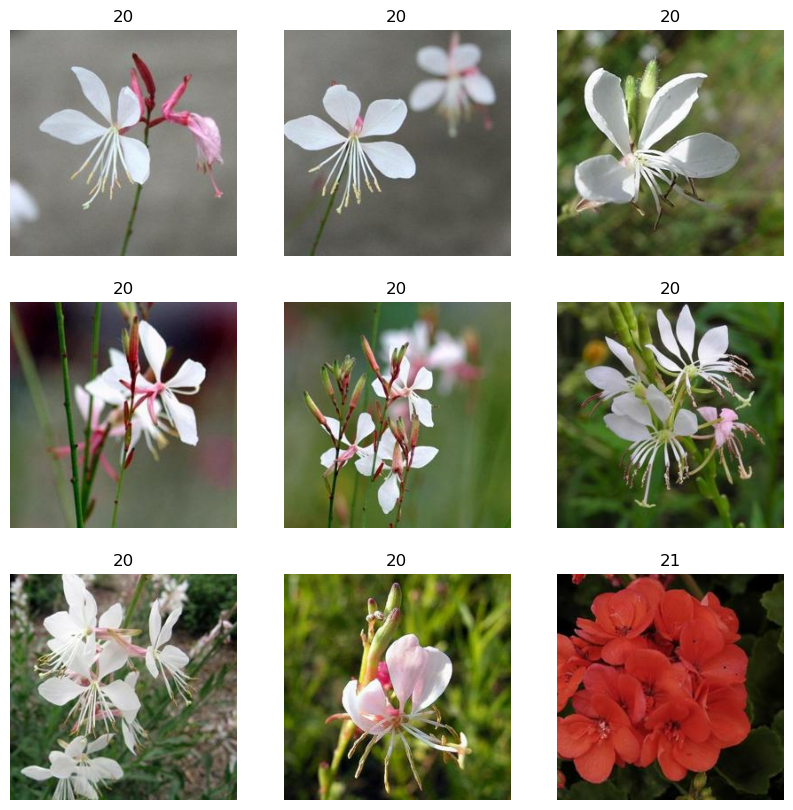

In [22]:
import matplotlib.pyplot as plt

def visualize_data(dataset, class_names, num_images=9, batch_index=0):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.skip(batch_index).take(1):
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(class_names[labels[i].numpy() - 1])
            plt.axis("off")
    plt.show()

class_names = [str(i) for i in range(1, 61)] 
batch_index = 6  # Change this value to visualize a different batch

print("Visualizing Training Data:")
visualize_data(train_dataset, class_names, batch_index=batch_index)

print("Visualizing Validation Data:")
visualize_data(val_dataset, class_names, batch_index=batch_index)


# **Data Analysis**

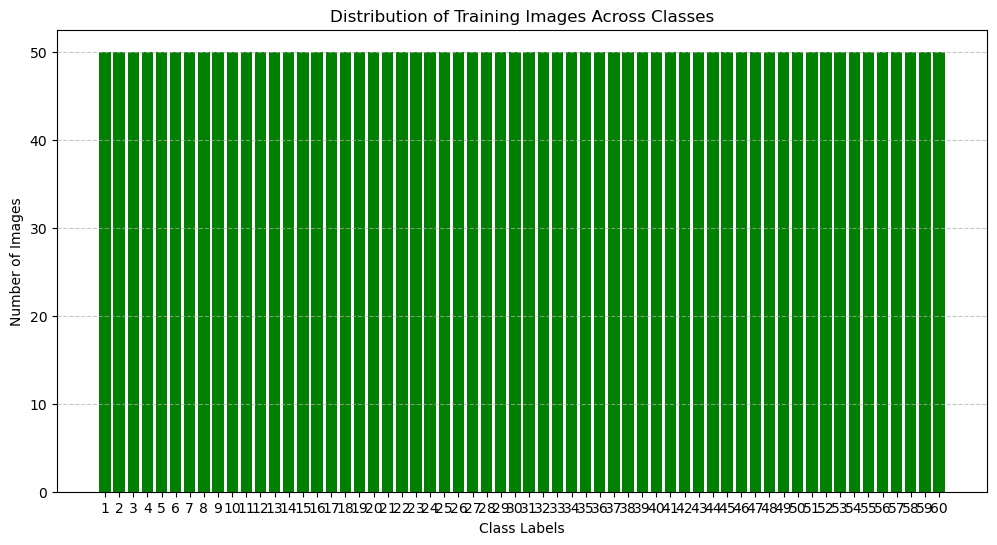

In [23]:
train_labels = load_labels(train_labels_path)
unique_classes, class_counts = np.unique(train_labels, return_counts=True)

plt.figure(figsize=(12, 6))
plt.bar(unique_classes, class_counts, color='green')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Images Across Classes')
plt.xticks(unique_classes)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
import pandas as pd
train_labels = load_labels(train_labels_path)

unique_classes, class_counts = np.unique(train_labels, return_counts=True)

df = pd.DataFrame({
    'Class Name': unique_classes,
    'Image Count': class_counts
})

print(df)

    Class Name  Image Count
0            1           50
1            2           50
2            3           50
3            4           50
4            5           50
5            6           50
6            7           50
7            8           50
8            9           50
9           10           50
10          11           50
11          12           50
12          13           50
13          14           50
14          15           50
15          16           50
16          17           50
17          18           50
18          19           50
19          20           50
20          21           50
21          22           50
22          23           50
23          24           50
24          25           50
25          26           50
26          27           50
27          28           50
28          29           50
29          30           50
30          31           50
31          32           50
32          33           50
33          34           50
34          35      

# **Data Augmentation**

In [25]:
# We define the data augmentation parameters below
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2)
])

def augment_image(image, label):
    return data_augmentation(image), label

def create_augmented_dataset(dataset, num_augmentations=15): #This function creates a dataset with each image having multiple augmentations
    augmented_dataset = dataset.flat_map(lambda image, label: tf.data.Dataset.from_tensors((image, label)).map(augment_image).repeat(num_augmentations))
    return augmented_dataset

augmented_train_dataset = create_augmented_dataset(train_dataset, num_augmentations=30)

for images, labels in augmented_train_dataset.take(1): #This is for checking the dimensions of images in a single batch
    print(images.shape, labels.shape)

(32, 256, 256, 3) (32,)


In [72]:
augmented_size = 0
for _ in augmented_train_dataset:
    augmented_size += 1
total_augmented_images = augmented_size * batch_size

print(f"Total number of augmented images: {total_augmented_images}")

Total number of augmented images: 90240


In [73]:
from collections import defaultdict

label_counts = defaultdict(int)

for _, labels in augmented_train_dataset:
    for label in labels.numpy():
        label_counts[label] += 1

label_count_list = list(label_counts.items())

for label, count in label_count_list:
    print(f"Label: {label}, Count: {count}")


Label: 1, Count: 1500
Label: 2, Count: 1500
Label: 3, Count: 1500
Label: 4, Count: 1500
Label: 5, Count: 1500
Label: 6, Count: 1500
Label: 7, Count: 1500
Label: 8, Count: 1500
Label: 9, Count: 1500
Label: 10, Count: 1500
Label: 11, Count: 1500
Label: 12, Count: 1500
Label: 13, Count: 1500
Label: 14, Count: 1500
Label: 15, Count: 1500
Label: 16, Count: 1500
Label: 17, Count: 1500
Label: 18, Count: 1500
Label: 19, Count: 1500
Label: 20, Count: 1500
Label: 21, Count: 1500
Label: 22, Count: 1500
Label: 23, Count: 1500
Label: 24, Count: 1500
Label: 25, Count: 1500
Label: 26, Count: 1500
Label: 27, Count: 1500
Label: 28, Count: 1500
Label: 29, Count: 1500
Label: 30, Count: 1500
Label: 31, Count: 1500
Label: 32, Count: 1500
Label: 33, Count: 1500
Label: 34, Count: 1500
Label: 35, Count: 1500
Label: 36, Count: 1500
Label: 37, Count: 1500
Label: 38, Count: 1500
Label: 39, Count: 1500
Label: 40, Count: 1500
Label: 41, Count: 1500
Label: 42, Count: 1500
Label: 43, Count: 1500
Label: 44, Count: 15

# **Visualising the images after augmentation**

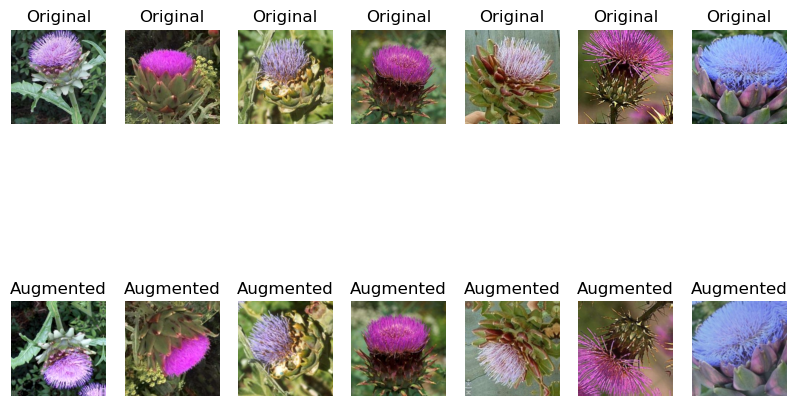

In [74]:
def visualize_augmentation(dataset, num_images=7):
    plt.figure(figsize=(10, 10))
    
    for images, labels in dataset.take(1):
        for i in range(num_images):
            # THis code is for the original image
            ax = plt.subplot(3, num_images, i + 1)
            plt.imshow(images[i].numpy())
            plt.title("Original")
            plt.axis("off")

            # This code is for the augmented image
            augmented_image, _ = augment_image(images[i], labels[i])
            ax = plt.subplot(3, num_images, i + 1 + num_images)
            plt.imshow(augmented_image.numpy())
            plt.title("Augmented")
            plt.axis("off")

    plt.show()

visualize_augmentation(train_dataset)


# **Applying PCA for Feature Extraction**

In [26]:
from sklearn.decomposition import PCA
from tqdm import tqdm

def collect_augmented_data(dataset, num_batches=100):
    images_list = []
    labels_list = []

    for _ in tqdm(range(num_batches), desc="Collecting Augmented Data"):
        try:
            images, labels = next(iter(dataset))
            images_list.append(images.numpy())
            labels_list.append(labels.numpy())
        except StopIteration:
            print("Reached the end of the dataset.")
            break

    all_images = np.concatenate(images_list, axis=0)
    all_labels = np.concatenate(labels_list, axis=0)
    return all_images, all_labels

augmented_images, augmented_labels = collect_augmented_data(augmented_train_dataset)

num_samples, height, width, channels = augmented_images.shape
reshaped_images = augmented_images.reshape(num_samples, height * width * channels)

pca = PCA(n_components=0.95)
pca_transformed_images = pca.fit_transform(reshaped_images)

print("Original shape:", reshaped_images.shape)
print("PCA transformed shape:", pca_transformed_images.shape)

Original shape: (3200, 196608)
PCA transformed shape: (3200, 1413)


In [27]:
def collect_validation_data(dataset, num_batches=100):
    images_list = []
    labels_list = []
    
    for _ in tqdm(range(num_batches), desc="Collecting Validation Data"):
        try:
            images, labels = next(iter(dataset))
            images_list.append(images.numpy())
            labels_list.append(labels.numpy())
        except StopIteration:
            print("Reached the end of the dataset.")
            break

    all_images = np.concatenate(images_list, axis=0)
    all_labels = np.concatenate(labels_list, axis=0)
    
    return all_images, all_labels

validation_images, validation_labels = collect_validation_data(val_dataset)

num_val_samples, _, _, _ = validation_images.shape
reshaped_validation_images = validation_images.reshape(num_val_samples, img_height * img_width * 3)
pca_transformed_validation_data = pca.transform(reshaped_validation_images)

In [28]:
print("Original shape:", reshaped_validation_images.shape)
print("PCA transformed shape:", pca_transformed_validation_data.shape)

Original shape: (3200, 196608)
PCA transformed shape: (3200, 1413)


# **Compiling and Training the Model**

In [39]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Input(shape=(pca_transformed_images.shape[1],)),
    
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),  
    layers.Dropout(0.5),          
    
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),  
    layers.Dropout(0.5),         
    
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),  
    
    layers.Dense(60, activation='softmax')
])

In [40]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)


In [41]:
history = model.fit(pca_transformed_images, augmented_labels, epochs=20, validation_data=(pca_transformed_validation_data, validation_labels))

Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 4.2528 - accuracy: 0.2906 - val_loss: 4.2591 - val_accuracy: 0.2812
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 1.5084 - accuracy: 0.9681 - val_loss: 4.8108 - val_accuracy: 0.3125
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 1.0000 - val_loss: 5.7754 - val_accuracy: 0.3125
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 1.0000 - val_loss: 6.2436 - val_accuracy: 0.3125
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 1.0000 - val_loss: 6.5797 - val_accuracy: 0.3125
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 0.2841 - accuracy: 1.0000 - val_loss: 6.7999 - val_accuracy: 0.3125
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 1.0000 - val_loss: 7.0268 - val_accuracy: 0.3125
Epoch 

In [42]:
model.evaluate(pca_transformed_validation_data, validation_labels)

100/100 [==============================] - 0s 461us/step - loss: 8.1032 - accuracy: 0.3125


[8.103196144104004, 0.3125]

In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               361984    
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 128)              

# **Visualising Training**

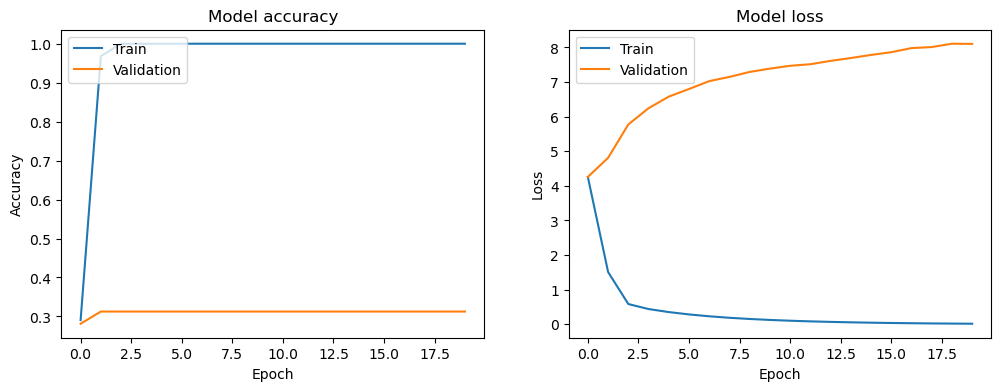

In [44]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [45]:
model.save('Akshay_Ishaan_Siddhartha.h5')

INFO:tensorflow:Assets written to: Akshay_Ishaan_Siddhartha.pkl/assets


INFO:tensorflow:Assets written to: Akshay_Ishaan_Siddhartha.pkl/assets


In [50]:
with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [46]:
# import os
# from tensorflow.keras.preprocessing import image
# import numpy as np
# import matplotlib.pyplot as plt

# # Example dictionary mapping image filenames to their original labels
# original_labels = {
#     '9_image_05271.jpg': 9,
#     '22_image_01372.jpg': 22,
#     # Add other image filenames and their corresponding labels here
# }

# # Directory containing validation images
# val_dir = './val_data'

# # Function to preprocess the image
# def preprocess_image(img_path, img_height, img_width):
#     img = image.load_img(img_path, target_size=(img_height, img_width))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
#     img_array = img_array / 255.0  # Normalize if needed
#     return img_array

# # Iterate through each image in the validation directory
# for img_filename in os.listdir(val_dir):
#     img_path = os.path.join(val_dir, img_filename)
    
#     # Preprocess the image
#     img_array = preprocess_image(img_path, img_height, img_width)
    
#     # If you used PCA transformation, apply it here
#     pca_transformed_img = pca.transform(img_array.reshape(1, -1))
    
#     # Predict the label
#     predictions = model.predict(pca_transformed_img)  # Use pca_transformed_img if PCA was applied
#     predicted_label = np.argmax(predictions, axis=1)
    
#     # Retrieve the original label
#     #original_label = original_labels.get(img_filename, 'Unknown')
#     original_label =  img_filename.split("_")[0]
#     # Print the predicted and original labels
#     print(f'Original label: {original_label}')
#     print(f'Predicted label: {predicted_label[0]}')
    
#     # Display the image
#     img = image.load_img(img_path, target_size=(img_height, img_width))
#     plt.imshow(img)
#     plt.title(f'Original label: {original_label}, Predicted label: {predicted_label[0]}')
#     plt.axis('off')  # Hide axes
#     plt.show()

In [53]:
import tensorflow as tf
import numpy as np
import os
from sklearn.decomposition import PCA
import pickle  # To load the PCA model

# Load the saved model
model = tf.keras.models.load_model('Akshay_Ishaan_Siddhartha.pkl')  # Provide the path to your saved model

# Image parameters
img_height = 256
img_width = 256
batch_size = 32

# Process image function with error handling
def process_image(file_path):
    img = tf.io.read_file(file_path)
    try:
        img = tf.image.decode_image(img, channels=3, expand_animations=False)  # Use expand_animations=False to handle gif frames
        img.set_shape([None, None, 3])  # Ensure the image has 3 channels
        img = tf.image.resize(img, [img_height, img_width])
        img = tf.cast(img, tf.float32) / 255.0  # Normalize pixel values
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None  # Return None for invalid images
    return img

# Create dataset function
def create_dataset(image_dir):
    image_paths = [os.path.join(image_dir, fname) for fname in sorted(os.listdir(image_dir))]
    
    def filter_valid_images(file_path):
        img = process_image(file_path)
        return img is not None

    image_paths = [img for img in image_paths if filter_valid_images(img)]  # Filter out invalid images

    dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    dataset = dataset.map(lambda x: process_image(x), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Load and preprocess the new dataset
def load_and_preprocess_dataset(image_dir):
    dataset = create_dataset(image_dir)

    images_list = []
    for images in dataset:
        images_list.append(images.numpy())
    
    all_images = np.concatenate(images_list, axis=0)
    return all_images

# Run PCA on the dataset
def apply_pca_on_images(images, pca_model_path='pca_model.pkl'):
    num_samples, height, width, channels = images.shape
    reshaped_images = images.reshape(num_samples, height * width * channels)

    # Load the PCA model (you need to save the PCA model earlier)
    with open(pca_model_path, 'rb') as f:
        pca = pickle.load(f)

    pca_transformed_images = pca.transform(reshaped_images)
    return pca_transformed_images

# Make predictions using the loaded model
def predict_on_dataset(image_dir, true_labels, pca_model_path='pca_model.pkl'):
    images = load_and_preprocess_dataset(image_dir)
    pca_transformed_images = apply_pca_on_images(images, pca_model_path)
    
    predictions = model.predict(pca_transformed_images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Calculate accuracy
    accuracy = np.mean(predicted_labels == true_labels)
    print(f'Prediction Accuracy: {accuracy * 100:.2f}%')

    return predicted_labels

# Load true labels for the validation dataset
def load_labels(labels_path):
    with open(labels_path, 'r') as file:
        labels = [line.strip() for line in file]
    return np.array(labels, dtype=int)

# Provide the path to the dataset folder and PCA model
dataset_folder = './val_data'  # Replace with the path to your dataset
val_labels_path = './val_labels.txt'  # Provide the path to your validation labels
true_labels = load_labels(val_labels_path)

predicted_labels = predict_on_dataset(dataset_folder, true_labels, pca_model_path='pca_model.pkl')

# Print the predicted labels
print("Predicted labels:", predicted_labels)


19/19 [==============================] - 0s 2ms/step
Prediction Accuracy: 1.67%
Predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1